In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("D:\\dataset\\IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Tokenization and Lemmatization

In [3]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

In [4]:
lemmatizer = WordNetLemmatizer()
for i in range(len(dataset)):
    review = re.sub('[^a-zA-z]',' ',dataset['review'][i]).lower()
    review = review.split()
    words = [lemmatizer.lemmatize(word) for word in review]
    dataset['review'][i] = ' '.join(words)

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size = 0.1, random_state=33)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [6]:
train_data.head()

,review,sentiment
0,i remember the event of this movie the ill fat...,positive
1,this is the sequel to octopus br br pff ok a l...,negative
2,this could be a cute movie for kid my grandson...,negative
3,oh yeah this one is definitely a strong conten...,negative
4,oh dear what a disappointment i ve been watchi...,negative


In [7]:
test_data.head()

,review,sentiment
0,this film wasn t good at all i wa able to catc...,negative
1,i chose to see this movie because it got a goo...,negative
2,this movie in away wa super clever it s theme ...,negative
3,this film ha all the earmark of too many cook ...,negative
4,this movie is of interest to the fan of the fa...,negative


In [8]:
train_data.shape

(45000, 2)

In [9]:
train_data['review'][0]

'i remember the event of this movie the ill fated cruise of donald crowhurst in in the golden globe single handed around the world yacht race i wa a year old living in england the previous year francis chichester later sir francis he wa knighted for his exploit had completed the first solo circumnavigation of the globe i remember it mostly because we were given time off school to watch his return on a grainy black and white tv and then his knighting by the queen it provoked a huge outpouring of patriotic fervor in the uk it all seems so quaint now chichester became a national hero but he had stopped half way in australia to re fit his yacht so the next logical step for yachtsman wa to attempt the journey without stopping br br it s important to remember that this wa a world pre gps when communication on land were still pretty erratic never mind in the middle of the ocean now with gps receiver that fit on a key chain and calculate a position within a metre anywhere on earth it s hard to

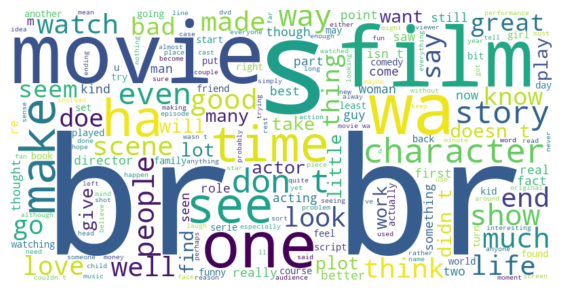

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(train_data["review"].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
def tokenize_sentences(dataset):
    tokenized_document = [] 
    for sent in dataset:
        words = nltk.word_tokenize(sent)
        tokenized_document.append(words)
    return tokenized_document

In [12]:
document_train = tokenize_sentences(train_data['review'])
document_test = tokenize_sentences(test_data['review'])

In [13]:
print(f"document_train:{len(document_train)}")
print(f"document_test:{len(document_test)}")

document_train:45000
document_test:5000


##### Word embedding with TF-IDF 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 300)
train_df_tfidf = pd.DataFrame(tv.fit_transform(train_data['review']).toarray())
test_df_tfidf = pd.DataFrame(tv.transform(test_data['review']).toarray())

In [15]:
tv.vocabulary_

{'the': 238,
 'of': 172,
 'this': 247,
 'movie': 159,
 'in': 117,
 'around': 21,
 'world': 291,
 'wa': 267,
 'year': 295,
 'old': 174,
 'he': 106,
 'for': 86,
 'his': 111,
 'had': 102,
 'first': 85,
 'it': 122,
 'because': 28,
 'we': 275,
 'were': 277,
 'time': 253,
 'off': 173,
 'to': 254,
 'watch': 271,
 'on': 175,
 'black': 38,
 'and': 15,
 'tv': 261,
 'then': 241,
 'by': 44,
 'all': 7,
 'seems': 214,
 'so': 224,
 'now': 171,
 'but': 43,
 'way': 274,
 're': 200,
 'without': 288,
 'br': 42,
 'that': 237,
 'when': 279,
 'still': 230,
 'pretty': 194,
 'never': 165,
 'mind': 153,
 'with': 287,
 'hard': 103,
 'you': 297,
 'could': 51,
 'go': 95,
 'quite': 198,
 'did': 54,
 'up': 263,
 'back': 25,
 'man': 146,
 'not': 169,
 'been': 29,
 'any': 17,
 'an': 14,
 'do': 58,
 'something': 227,
 'big': 36,
 'life': 132,
 'saw': 207,
 'well': 276,
 'over': 184,
 'money': 156,
 'mean': 151,
 'more': 157,
 'than': 236,
 'which': 281,
 'would': 294,
 'him': 110,
 'found': 87,
 'always': 11,
 'love':

In [16]:
train_df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,0.0,0.0,0.0,0.000000,0.020397,0.000000,0.054528,0.026644,0.038907,...,0.0,0.052019,0.028225,0.000000,0.122664,0.064661,0.0,0.052583,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.310862,0.086067,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.119726,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.147530,0.090730,0.0,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.053839,0.000000,0.000000,0.089661,0.000000,0.000000,...,0.0,0.000000,0.123759,0.000000,0.076837,0.094509,0.0,0.144103,0.0,0.049761
4,0.068175,0.0,0.0,0.0,0.000000,0.000000,0.110489,0.060066,0.000000,0.000000,...,0.0,0.000000,0.000000,0.125022,0.000000,0.189943,0.0,0.000000,0.0,0.000000


In [17]:
train_df_tfidf.shape

(45000, 300)

In [18]:
train_df_tfidf.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Length: 300, dtype: int64

In [19]:
test_df_tfidf.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Length: 300, dtype: int64

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df_tfidf["Output"] = encoder.fit_transform(train_data["sentiment"])

In [22]:
# indepedent and dependent feature
X=train_df_tfidf.drop(["Output"],axis=1)
y=train_df_tfidf["Output"]

In [23]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X,y, test_size = 0.2, random_state=33)

In [24]:
models = {
    "naive_bayes":GaussianNB(),
    "Decision_Classifier": DecisionTreeClassifier(),
    "Random_Forest_Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),

}

In [25]:
model_name = []
model_accuracy = []

for classifier_name, classifier in models.items():
    # train the model
    classifier.fit(X_train_tfidf, y_train_tfidf)
    # Make prediction
    y_train_pred = classifier.predict(X_train_tfidf)
    y_test_pred = classifier.predict(X_test_tfidf)
    # Evalution
    train_Accuracy = accuracy_score(y_train_tfidf,y_train_pred)
    train_clf_report = classification_report(y_train_tfidf,y_train_pred)
    test_accuary = accuracy_score(y_test_tfidf,y_test_pred)
    test_clf_report = classification_report(y_test_tfidf,y_test_pred)
    test_confusion_matrix= confusion_matrix(y_test_tfidf,y_test_pred)


    print(classifier_name)
    model_name.append(classifier_name)
    print("preformance on train_df\n")
    print(f"Accuracy: {train_Accuracy}\n")
    print(f"classification report:\n {train_clf_report}\n")

    print("\n\n")
    print("preformance on test_df\n")
    print(f"Accuracy: {test_accuary}\n")
    print(f"classification report:\n {test_clf_report}\n")
    model_accuracy.append(test_accuary)
    print("***************************")

naive_bayes
preformance on train_df

Accuracy: 0.7591666666666667

classification report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76     18022
           1       0.75      0.77      0.76     17978

    accuracy                           0.76     36000
   macro avg       0.76      0.76      0.76     36000
weighted avg       0.76      0.76      0.76     36000





preformance on test_df

Accuracy: 0.7548888888888889

classification report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      4445
           1       0.75      0.77      0.76      4555

    accuracy                           0.75      9000
   macro avg       0.75      0.75      0.75      9000
weighted avg       0.75      0.75      0.75      9000


***************************
Decision_Classifier
preformance on train_df

Accuracy: 1.0

classification report:
               precision    recall  f1-score   support

     

#### Word embedding with Word2vec 

In [26]:
import gensim
from gensim.models import Word2Vec

In [27]:
model=gensim.models.Word2Vec(document_train,window=5,min_count=2)

In [28]:
model.wv.index_to_key

['the',
 'a',
 'and',
 'of',
 'to',
 'is',
 'it',
 'br',
 'in',
 'i',
 'this',
 'that',
 's',
 'movie',
 'wa',
 'film',
 'for',
 'with',
 'but',
 'you',
 't',
 'on',
 'not',
 'he',
 'are',
 'his',
 'one',
 'have',
 'be',
 'at',
 'all',
 'they',
 'by',
 'an',
 'who',
 'like',
 'so',
 'from',
 'there',
 'or',
 'her',
 'just',
 'out',
 'if',
 'about',
 'ha',
 'what',
 'time',
 'can',
 'some',
 'good',
 'character',
 'more',
 'when',
 'very',
 'she',
 'up',
 'no',
 'story',
 'my',
 'even',
 'get',
 'would',
 'make',
 'see',
 'which',
 'only',
 'really',
 'their',
 'had',
 'me',
 'well',
 'scene',
 'we',
 'were',
 'much',
 'than',
 'bad',
 'people',
 'been',
 'other',
 'great',
 'will',
 'do',
 'also',
 'into',
 'because',
 'how',
 'don',
 'first',
 'him',
 'most',
 'show',
 'way',
 'thing',
 'made',
 'then',
 'them',
 'could',
 'life',
 'too',
 'think',
 'any',
 'after',
 'go',
 'know',
 'watch',
 'love',
 'two',
 'plot',
 'many',
 'actor',
 'being',
 'seen',
 'year',
 'say',
 'end',
 'nev

In [29]:
model.wv.similar_by_word("happy")

[('afraid', 0.5776910781860352),
 ('grateful', 0.5304871201515198),
 ('sad', 0.5278094410896301),
 ('satisfied', 0.5159924626350403),
 ('upset', 0.5131963491439819),
 ('pleased', 0.5130193829536438),
 ('disappointed', 0.5051481127738953),
 ('bitter', 0.5035821199417114),
 ('lucky', 0.49573060870170593),
 ('fond', 0.4789581298828125)]

In [30]:
model.wv.similar_by_word("film")

[('movie', 0.9264885783195496),
 ('documentary', 0.7243312001228333),
 ('flick', 0.7197383046150208),
 ('picture', 0.710364580154419),
 ('it', 0.5935713648796082),
 ('cinema', 0.5911968350410461),
 ('thriller', 0.5906179547309875),
 ('sequel', 0.5734280943870544),
 ('genre', 0.5643267631530762),
 ('presentation', 0.5610936880111694)]

In [31]:
cosine_similarity = model.wv.similarity("happy", "joy")
print(cosine_similarity)

0.39150172


In [32]:
model.wv["movie"].shape

(100,)

In [33]:
def avgword2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)

In [34]:
from tqdm import tqdm
def create_df_with_avgword2vec(document):
    list = []
    for i in tqdm(range(len(document))):
        list.append(avgword2vec(document[i]))
      
    print(len(list))
    return (pd.DataFrame(list))
    

In [35]:
train_df = create_df_with_avgword2vec(document_train)

100%|████████████████████████████████████████████████████████████████████████████| 45000/45000 [23:06<00:00, 32.47it/s]


45000


In [36]:
test_df = create_df_with_avgword2vec(document_test)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:30<00:00, 55.50it/s]

5000


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df["Output"] = encoder.fit_transform(train_data["sentiment"])

In [38]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
0,-0.235941,-0.347740,-0.067456,0.289389,-0.091811,0.449349,0.401540,-0.263197,-0.307816,0.032309,...,0.175674,0.081274,-0.197764,0.483820,-0.294223,0.016715,-0.756842,-0.356304,0.268087,1
1,-0.340172,-0.736593,0.127980,0.705494,-0.529261,0.547221,0.701220,-0.651871,0.036057,0.202569,...,-0.012354,-0.120348,0.363231,0.722209,-0.476036,-0.093892,-0.663296,-0.546282,0.031802,0
2,-0.045625,-0.518134,-0.041400,0.628284,-0.426456,0.845216,0.624781,-0.928565,-0.272776,-0.042781,...,0.021910,0.052329,0.367164,0.617434,-0.754916,-0.191809,-0.997890,-0.680370,0.086859,0
3,-0.141921,-0.578063,-0.031584,0.396581,-0.141210,0.435411,0.546508,-0.210153,-0.307150,0.015734,...,0.074434,-0.084826,-0.043350,0.526609,-0.485795,-0.132238,-0.768070,-0.166915,0.097380,0
4,-0.161142,-0.567907,0.043092,0.661530,-0.493593,0.601667,0.690668,-0.634281,-0.346285,0.135321,...,0.043924,0.166060,0.164558,0.706664,-0.666892,0.050147,-0.658596,-0.137186,0.180088,0


In [39]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.355384,-0.509105,-0.207023,0.365910,-0.295185,0.386151,0.571316,-0.331243,-0.224232,-0.028911,...,-0.595232,0.139974,-0.045591,-0.192888,0.581165,-0.502773,0.032353,-0.855663,-0.277109,-0.005400
1,-0.146503,-0.728323,0.000656,0.426493,-0.398812,0.500600,0.829934,-0.649519,-0.170457,0.039414,...,-0.627252,-0.024526,-0.290905,0.201019,0.601588,-0.673200,-0.096838,-0.943268,-0.272651,-0.193928
2,0.101419,-0.679806,-0.002189,0.494655,-0.391617,0.660817,0.642138,-0.557836,-0.254726,0.021459,...,-0.656485,0.107929,-0.139784,0.263640,0.484888,-0.690557,-0.060450,-0.905530,-0.358393,-0.043441
3,-0.246520,-0.522588,-0.290739,0.338961,-0.305252,0.317201,0.512487,-0.218725,-0.182982,-0.071539,...,-0.462619,-0.004721,-0.056631,-0.161656,0.759479,-0.621768,-0.001472,-0.680599,-0.022739,-0.030692
4,-0.358644,-0.220183,-0.221190,0.564267,-0.324080,0.161130,0.651444,-0.326815,-0.112066,0.113424,...,-0.557453,0.116064,0.309274,-0.424513,0.580991,-0.391208,0.135158,-0.737884,-0.352069,0.078208


In [40]:
train_df.shape

(45000, 101)

In [41]:
# "0" for negative sentiment, and "1" for positive sentiment.
train_df.Output.unique()

array([1, 0])

In [42]:
train_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
Output    0
Length: 101, dtype: int64

In [43]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,-0.218178,-0.576681,-0.078246,0.426899,-0.275581,0.403736,0.568499,-0.386623,-0.223034,-0.025974,...,0.031672,0.033278,0.006011,0.615392,-0.538812,-0.073235,-0.783569,-0.256500,0.043074,0.500733
std,0.141217,0.185862,0.141720,0.197801,0.211467,0.201182,0.164815,0.317729,0.128488,0.105910,...,0.159273,0.176223,0.213975,0.132247,0.188169,0.132051,0.120680,0.148398,0.150608,0.500005
min,-1.181518,-1.666303,-1.346982,-0.480081,-1.771823,-0.838939,-0.526340,-2.106842,-1.162128,-1.174121,...,-1.460315,-0.971471,-1.475922,-0.238819,-2.773760,-1.202305,-1.532064,-0.926746,-1.048384,0.000000
25%,-0.307043,-0.698842,-0.170550,0.294181,-0.411787,0.272496,0.454730,-0.593117,-0.305059,-0.091826,...,-0.071240,-0.083264,-0.144621,0.528906,-0.662220,-0.155795,-0.860017,-0.353508,-0.049293,0.000000
50%,-0.219094,-0.575427,-0.081727,0.422070,-0.261955,0.403787,0.561732,-0.370232,-0.224704,-0.025643,...,0.030723,0.029731,-0.004572,0.608234,-0.539148,-0.071139,-0.785332,-0.259587,0.043709,1.000000
75%,-0.130852,-0.454572,0.010038,0.555068,-0.124547,0.534453,0.673867,-0.164362,-0.143177,0.040023,...,0.133503,0.146676,0.145136,0.694417,-0.414574,0.010544,-0.709142,-0.162684,0.136949,1.000000
max,0.602904,0.384728,1.072680,2.027232,0.500854,1.299697,1.630919,1.129797,0.836973,1.043967,...,0.826888,0.860373,1.125072,1.599276,0.363096,0.719426,0.199076,0.904435,1.155057,1.000000


In [44]:
#Independent_feature and Dependent_feature
X=train_df.drop(["Output"],axis=1)
y=train_df["Output"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=33)

In [46]:
models = {
    "naive_bayes":GaussianNB(),
    "Decision_Classifier": DecisionTreeClassifier(),
    "Random_Forest_Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),

}

In [47]:
model_name = []
model_accuracy = []

for classifier_name, classifier in models.items():
    # train the model
    classifier.fit(X_train, y_train)
    # Make prediction
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    # Evalution
    train_Accuracy = accuracy_score(y_train,y_train_pred)
    train_clf_report = classification_report(y_train,y_train_pred)
    test_accuary = accuracy_score(y_test,y_test_pred)
    test_clf_report = classification_report(y_test,y_test_pred)
    test_confusion_matrix= confusion_matrix(y_test,y_test_pred)


    print(classifier_name)
    model_name.append(classifier_name)
    print("preformance on train_df\n")
    print(f"Accuracy: {train_Accuracy}\n")
    print(f"classification report:\n {train_clf_report}\n")

    print("\n\n")
    print("preformance on test_df\n")
    print(f"Accuracy: {test_accuary}\n")
    print(f"classification report:\n {test_clf_report}\n")
    model_accuracy.append(test_accuary)
    print("***************************")
    
    

naive_bayes
preformance on train_df

Accuracy: 0.6841111111111111

classification report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.70     18022
           1       0.70      0.64      0.67     17978

    accuracy                           0.68     36000
   macro avg       0.69      0.68      0.68     36000
weighted avg       0.69      0.68      0.68     36000





preformance on test_df

Accuracy: 0.6778888888888889

classification report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69      4445
           1       0.70      0.64      0.67      4555

    accuracy                           0.68      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.68      0.68      0.68      9000


***************************
Decision_Classifier
preformance on train_df

Accuracy: 1.0

classification report:
               precision    recall  f1-score   support

     

In [48]:
model_name

['naive_bayes',
 'Decision_Classifier',
 'Random_Forest_Classifier',
 'XGBClassifier']

In [49]:
best_classifer_index = model_accuracy.index(max(model_accuracy))
best_model_name = model_name[best_classifer_index]
best_classifier = models[best_model_name]
best_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
y_prob = best_classifier.predict_proba(X_test)
print(f"Accuracy of the model:  {accuracy_score(y_test,y_pred)}")
print(f"f1_score of the model:  {f1_score(y_test,y_pred)}")

Accuracy of the model:  0.8308888888888889
f1_score of the model:  0.8333333333333333


Text(0.5, 1.0, 'Confusion Matrix')

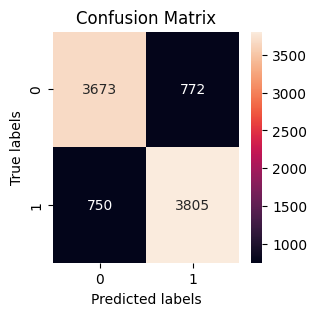

In [51]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap (confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [52]:
prediction = best_classifier.predict(test_df)

In [53]:
prediction

array([0, 0, 0, ..., 0, 1, 1])

In [56]:
Prediction_proba = best_classifier.predict_proba(test_df)
Prediction_proba

array([[0.8126615 , 0.1873385 ],
       [0.9968651 , 0.00313493],
       [0.87980235, 0.12019763],
       ...,
       [0.86973226, 0.13026777],
       [0.0475325 , 0.9524675 ],
       [0.03317946, 0.96682054]], dtype=float32)

In [58]:
predicted_value = encoder.inverse_transform(prediction)
predicted_value

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [76]:
result_df=pd.DataFrame(predicted_value,columns=['predict_value'])
result_df.head()

,predict_value
0,negative
1,negative
2,negative
3,negative
4,negative


In [78]:
## compare actual value with predicted_value
compare_df = pd.concat([test_data["sentiment"], result_df['predict_value']], axis=1) 

In [80]:
compare_df

,sentiment,predict_value
0,negative,negative
1,negative,negative
2,negative,negative
3,negative,negative
4,negative,negative
...,...,...
4995,negative,positive
4996,negative,negative
4997,negative,negative
4998,positive,positive


In [84]:
true_predict = 0
for i in range(len(compare_df)):
    if compare_df['sentiment'][i] == compare_df['predict_value'][i]:
        true_predict += 1    

In [86]:
percentage_of_true_prediction = (true_predict/len(compare_df)) * 100
percentage_of_true_prediction

83.28